# Лабораторная работа 4, задача 2, вариант 17

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def func(x, y, y_der):
    return - y_der*(x-3)/(x**2-1) + y/(x**2-1)

In [ ]:
def g(x, y, k):
    return k

In [ ]:
def p(x):
    return (x-3)/(x**2-1)

In [ ]:
def q(x):
    return - 1/(x**2-1)

In [ ]:
def absolute_solve(x):
    return x-3 + 1/(x+1)

In [ ]:
def f(x):
    return 0

In [ ]:
def stop(y, y1, eps):
    if abs(y[-1] - y1) > eps:
        return True
    else:
        return False

In [ ]:
def runge_kutta(f, a, b, h, y0, z):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    y = [y0]
    k = [z] 
    for i in range(n):
        k1 = h * g(x[i], y[i], k[i])
        l1 = h * f(x[i], y[i], k[i])
        k2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k1, k[i] + 0.5 * l1)
        l2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1, k[i] + 0.5 * l1)
        k3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k2, k[i] + 0.5 * l2)
        l3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k2, k[i] + 0.5 * l2)
        k4 = h * g(x[i] + h, y[i] + k3, k[i] + l3)
        l4 = h * f(x[i] + h, y[i] + k3, k[i] + l3)
        y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        k.append(k[i] + (l1 + 2 * l2 + 2 * l3 + l4) / 6)
    return x, y, k

In [ ]:
def newN(n_last, n, ans_last, ans, y1):
    x, y = ans_last[0], ans_last[1]
    phi_last = y[-1] - y1
    x, y = ans[0], ans[1]
    phi = y[-1] - y1
    return n - (n - n_last) / (phi - phi_last) * phi

In [ ]:
def shooting_method(a, b, y0, y1, h, eps):
    n_last = 1
    n = 0.8
    y_der = n_last
    ans_last = runge_kutta(func, a, b, h, n_last, y_der)[:2]
    y_der = n
    ans = runge_kutta(func, a, b, h, n, y_der)[:2]

    while stop(ans[1], y1, eps):
        n, n_last = newN(n_last, n, ans_last, ans, y1), n
        ans_last = ans
        y_der = n
        ans = runge_kutta(func, a, b, h, y0, y_der)[:2]

    return ans

In [ ]:
def tma(a, b, c, d, shape):
    p = [-c[0] / b[0]]
    q = [d[0] / b[0]]
    x = [0] * (shape + 1)
    for i in range(1, shape):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    for i in reversed(range(shape)):
        x[i] = p[i] * x[i + 1] + q[i]
    return x[:-1]

In [ ]:
def finite_difference(a, b, alpha, beta, delta, gamma, y0, y1, h):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    A = [0] + [1 - p(x[i]) * h / 2 for i in range(0, n - 1)] + [-gamma]
    B = [alpha * h - beta] + [q(x[i]) * h ** 2 - 2 for i in range(0, n - 1)] + [delta * h + gamma]

    C = [beta] + [1 + p(x[i]) * h / 2 for i in range(0, n - 1)] + [0]
    D = [y0 * h] + [f(x[i]) * h ** 2 for i in range(0, n - 1)] + [y1 * h]

    y = tma(A, B, C, D, len(A))
    return x, y

In [ ]:
def runge_romberg(ans, exact):
    k = ans[0]['h'] / ans[1]['h']
    y1 = [yi for xi, yi in zip(ans[0]['Shooting']['x'], ans[0]['Shooting']['y']) if xi in ans[1]['Shooting']['x']]
    y2 = [yi for xi, yi in zip(ans[1]['Shooting']['x'], ans[1]['Shooting']['y']) if xi in ans[0]['Shooting']['x']]
    shoot_err = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(y1, y2)]
    x_ex = [xi for xi in ans[0]['Shooting']['x'] if xi in ans[1]['Shooting']['x']]
    y_ex = [absolute_solve(i) for i in x_ex]
    for i in range(len(shoot_err)):
        shoot_err[i] = abs(shoot_err[i] - y_ex[i])

    y1 = [yi for xi, yi in zip(ans[0]['FD']['x'], ans[0]['FD']['y']) if xi in ans[1]['FD']['x']]
    y2 = [yi for xi, yi in zip(ans[1]['FD']['x'], ans[1]['FD']['y']) if xi in ans[0]['FD']['x']]
    fd_err = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(y1, y2)]
    x_ex = [xi for xi in ans[0]['FD']['x'] if xi in ans[1]['FD']['x']]
    y_ex = [absolute_solve(i) for i in x_ex]
    for i in range(len(fd_err)):
        fd_err[i] = abs(fd_err[i] - y_ex[i])

    return {'Shooting': shoot_err, 'FD': fd_err}

In [ ]:
def sse(f, y):
    return round(sum([(f_i - y_i) ** 2 for f_i, y_i in zip(f, y)]), 5)

Вариант 17:


---


Краевая задача:
$$
(x^2-1)y''+(x-3)y'-y=0\\
y'(0)=0\\
y'(1)+y(1)=-0.75\\
x\in{[0,1]}\\
$$
Точное решение:
$$
y = x-3+\frac{1}{x+1}
$$

In [ ]:
# вариант 17
a = 0
b = 1
alpha = 0
delta = 1
gamma = 1
beta = 1
y0 = 0.0
y1 = -0.75

# для метода стрельбы создадим краевые условия первого рода
y0_ = absolute_solve(0)
y1_ = absolute_solve(1)
step = 1 / 60
eps = 1e-5

print(f'Interval: [{a}, {b}]')
print(f'y0 = {y0}, y1 = {y1}')
print()

Interval: [0, 1]
y0 = 0.0, y1 = -0.75



In [ ]:
res = []
res2 = []
ans = []
steps = [step, step / 2]
i = 0
for h in steps:
    res.append(shooting_method(a, b, y0_, y1_, h, eps))
    res2.append(finite_difference(a, b, alpha, beta, delta, gamma, y0, y1, h))
    ans.append({
        "h": h,
        "Shooting": {'x': res[i][0],  'y': res[i][1]},
        "FD":       {'x': res2[i][0], 'y': res2[i][1]}
    })

    i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


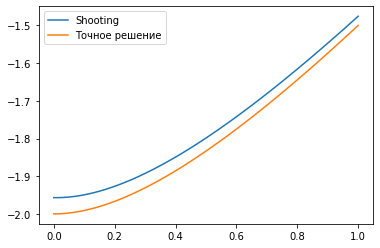

In [ ]:
abs_solve = []
for x_ in ans[0]['FD']['x']:
  abs_solve.append(absolute_solve(x_))
plt.plot(ans[0]['FD']['x'],ans[0]['FD']['y'])
plt.plot(ans[0]['FD']['x'],abs_solve)
plt.legend(['Shooting','Точное решение'])

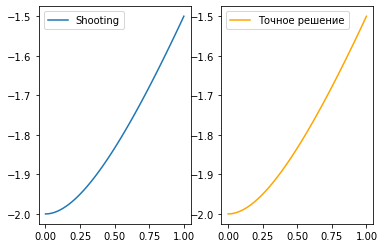

In [ ]:
abs_solve = []
for x_ in ans[1]['Shooting']['x']:
  abs_solve.append(absolute_solve(x_))

figure, ax = plt.subplots(1,2)
ax[0].plot(ans[1]['Shooting']['x'],ans[1]['Shooting']['y'])
ax[1].plot(ans[1]['Shooting']['x'],abs_solve,c="orange")
ax[0].legend(['Shooting'])
ax[1].legend(['Точное решение'])

In [ ]:
exact = []
for h in steps:
    x_ex = [i for i in np.arange(a, b + h, h)]
    y_ex = [absolute_solve(i) for i in x_ex]
    exact.append((x_ex, y_ex))

err = runge_romberg(ans, exact)
print("All errors")
print('Shooting method runge error: {}'.format(err['Shooting']))
print('Finite difference method runge error: {}'.format(err['FD']))

All errors
Shooting method runge error: [0.0, 2.0774217901475822e-09, 4.074732329328867e-09, 5.993554541561252e-09, 7.835620596807757e-09, 9.602738382241682e-09, 1.1296768853696904e-08, 1.2919601388716728e-08, 1.447313824343155e-08, 1.5959278343302685e-08, 1.737990773520437e-08, 1.8736890261550343e-08, 2.003206112100031e-08, 2.1267217986675746e-08, 2.244412189433831e-08, 2.35644905810517e-08, 2.4629996486780215e-08, 2.5642266754388743e-08, 2.6602880343062907e-08, 2.751336891648748e-08, 2.837521617671257e-08, 2.918985719801981e-08, 2.9958680647368396e-08, 3.0683027452127476e-08, 3.136419257643297e-08, 3.2003425687321396e-08, 3.260193293108671e-08, 3.316087471283424e-08, 3.3681369693283614e-08, 3.4164496121036336e-08, 3.461128916804057e-08, 3.5022744704349407e-08, 3.539981929812086e-08, 3.574342977152867e-08, 3.6054454755074516e-08, 3.6333734465543444e-08, 3.658206870760239e-08, 3.680021976038006e-08, 3.698890838066404e-08, 3.7148813802900804e-08, 3.7280570408526614e-08, 3.73847635071200